#### Pymaceuticals Analysis

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [47]:

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
tumor_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [48]:
# Checking the number of mice.
mouse = tumor_df["Mouse ID"].unique()
mouse_count = len(mouse)
mouse_count


249

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_dup = tumor_df.loc[tumor_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_dup


array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_df = tumor_df.loc[tumor_df["Mouse ID"] == "g989", : ]
mouse_dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cl_mouse_df = tumor_df[tumor_df["Mouse ID"].isin(mouse_dup_df) == False]
# cl_mouse_df.head()

cl_mouse_df = tumor_df[tumor_df["Mouse ID"] != "g989"]
cl_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [52]:
# Checking the number of mice in the clean DataFrame.
cl_tumor_df_ck = cl_mouse_df["Mouse ID"].unique()
cl_tumor_df_count = len(cl_tumor_df_ck)
cl_tumor_df_count



248

#### Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame. 


gr_drug = cl_mouse_df.groupby(["Drug Regimen"])
# gr_drug.count().head()
gr_drug_mean = gr_drug["Tumor Volume (mm3)"].mean()
# gr_drug_mean.head()
gr_drug_mean = gr_drug["Tumor Volume (mm3)"].mean()
gr_drug_median = gr_drug["Tumor Volume (mm3)"].median()
gr_drug_var = gr_drug["Tumor Volume (mm3)"].var()
gr_drug_std = gr_drug["Tumor Volume (mm3)"].std()
gr_drug_sem = gr_drug["Tumor Volume (mm3)"].sem()

gr_drug_df = pd.DataFrame({"Mean Tumor Volume" : gr_drug_mean, "Median Tumor Volume" : gr_drug_median,
                        "Tumor Volume Variance" : gr_drug_var, "Tumor Volume Std. Dev." : gr_drug_std, 
                        "Tumor Volume Std. Err." : gr_drug_sem})

gr_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
gr_drug_agg_df = cl_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
gr_drug_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

#### Bar and Pie Charts

In [55]:
# list drugs
cl_mouse_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [56]:
# list Timepoints
cl_mouse_df["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [57]:
cl_mouse_df["Drug Regimen"].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

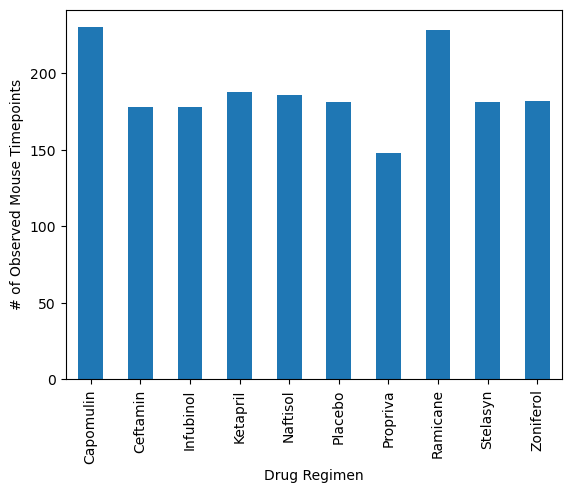

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
# for each drug regimen using Pandas.
cl_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count().reset_index(name="Timepoint").plot.bar(x="Drug Regimen",y="Timepoint",legend=False)
plt.ylabel("# of Observed Mouse Timepoints")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

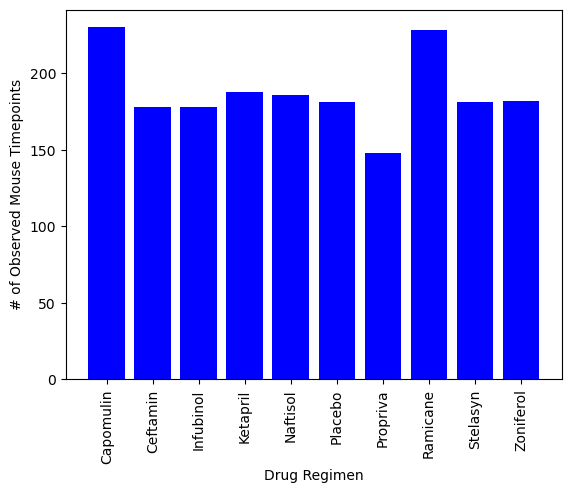

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
# for each drug regimen using pyplot.

plot = cl_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count().reset_index(name="Timepoint")
tm_pt = plot["Timepoint"]
x_axis = np.arange(len(tm_pt))
dr_reg = plot["Drug Regimen"]

plt.bar(x_axis,tm_pt,color="b")
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations,dr_reg)
#labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")


In [60]:
cl_sx_ct_df = cl_mouse_df["Sex"].value_counts()
cl_sx_ct_df


Sex
Male      958
Female    922
Name: count, dtype: int64

Text(0, 0.5, 'Sex')

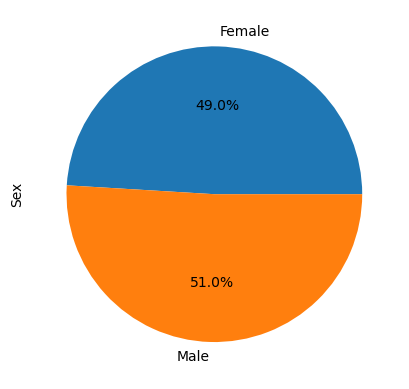

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cl_mouse_df.groupby(["Sex"])["Mouse ID"].count().plot.pie(y=["Sex"], label="",autopct="%1.1f%%")
plt.ylabel("Sex")




Text(0, 0.5, 'Sex')

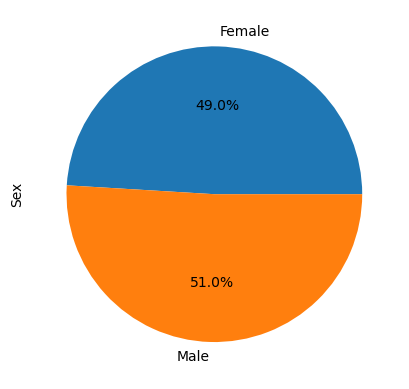

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = cl_mouse_df.groupby(["Sex"])["Mouse ID"].count().reset_index(name = "Sex - Mouse ID")
sx = pie_plot["Sex"]
Count = pie_plot["Sex - Mouse ID"]
plt.pie(Count, labels = sx, autopct = "%1.1f%%")
plt.ylabel("Sex")

#### Quartiles, Outliers, and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#treatment dataframes
Capomulin = cl_mouse_df.loc[cl_mouse_df["Drug Regimen"] == "Capomulin", : ]
Ramicane = cl_mouse_df.loc[cl_mouse_df["Drug Regimen"] == "Ramicane", : ]
Infubinol = cl_mouse_df.loc[cl_mouse_df["Drug Regimen"] == "Infubinol", : ]
Ceftamin = cl_mouse_df.loc[cl_mouse_df["Drug Regimen"] == "Ceftamin", : ]

In [64]:

#concatenate the treatment dataframes
treatments = [Capomulin, Ramicane, Infubinol, Ceftamin]
trt_df = pd.concat(treatments)

In [65]:
# Start by getting the last (greatest) timepoint for each mouse
gr_ID = cl_mouse_df.groupby(["Mouse ID"])
last_tp = gr_ID["Timepoint"].max()
# last_tp["Mouse ID"].value_counts()
# cl_mouse_df["Drug Regimen"].value_counts()
last_tp.head()


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [66]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mg_trt_lt = pd.merge(trt_df, last_tp, on = "Mouse ID")
#use timepoint_x and timepoint_y to identify the Boolean "Last Time" 
mg_trt_lt["Last Time"] = mg_trt_lt["Timepoint_x"] == mg_trt_lt["Timepoint_y"]
mg_trt_lt.head()


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Last Time
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,45,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,45,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,45,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,45,False


In [67]:
# only want Last Time by filtering with boolean
mg_trt_lt.drop(mg_trt_lt.loc[mg_trt_lt["Last Time"] == False].index , inplace = True)
mg_trt_lt


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Last Time
9,b128,45,38.982878,2,Capomulin,Female,9,22,45,True
17,j246,35,38.753265,1,Capomulin,Female,21,21,35,True
27,r554,45,32.377357,3,Capomulin,Female,8,17,45,True
37,s185,45,23.343598,1,Capomulin,Female,3,17,45,True
47,b742,45,38.939633,0,Capomulin,Male,7,21,45,True
...,...,...,...,...,...,...,...,...,...,...
787,p438,45,61.433892,1,Ceftamin,Female,11,26,45,True
793,b487,25,56.057749,1,Ceftamin,Female,6,28,25,True
803,o287,45,59.741901,4,Ceftamin,Male,2,28,45,True
812,q483,40,64.192341,1,Ceftamin,Male,6,26,40,True


In [68]:
# new summary dataframe for Drug/Mouse Id/Last Time/Tumor Volume
mg_trt_lt_new = mg_trt_lt[["Drug Regimen", "Mouse ID", "Timepoint_x", "Tumor Volume (mm3)"]]
# mg_trt_lt_new.head()
len(mg_trt_lt_new)


100

In [69]:

# Put treatments into a list for for loop (and later for plot labels)
trx_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
 # Locate the rows which contain mice on each drug and get the tumor volumes
for x in trx_list:
    vol = mg_trt_lt_new.loc[mg_trt_lt_new["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    tumor_vol_data.append(vol)
    
    # # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
  
    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers 
    outliers = vol.loc[(vol>upper_bound) | (vol<lower_bound)]
    if len(outliers) > 0:
        print(f"{x}'s potential outliers:{outliers}")

Infubinol's potential outliers:459    36.321346
Name: Tumor Volume (mm3), dtype: float64


Text(0, 0.5, 'Final Tumor Volume (mm3)')

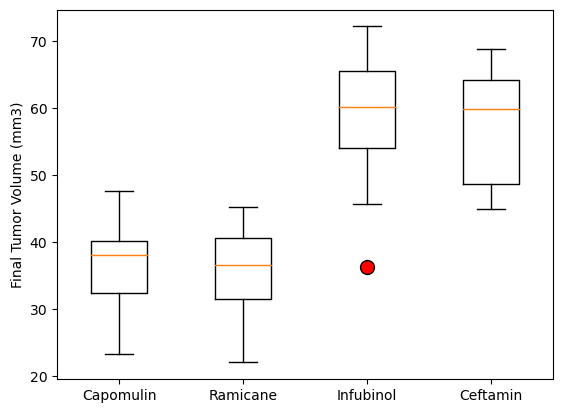

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = trx_list, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")

#### Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

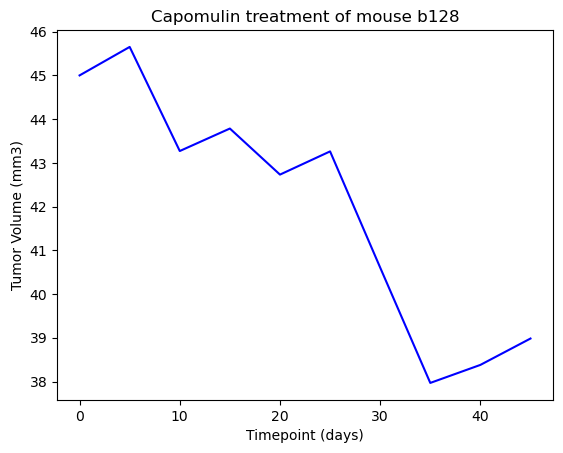

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# mouse b128
b128_mouse = cl_mouse_df.loc[cl_mouse_df["Mouse ID"] == "b128", : ]
x_axis = b128_mouse["Timepoint"]
y_axis = b128_mouse["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse b128")
plt.plot(x_axis, y_axis, color= "blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

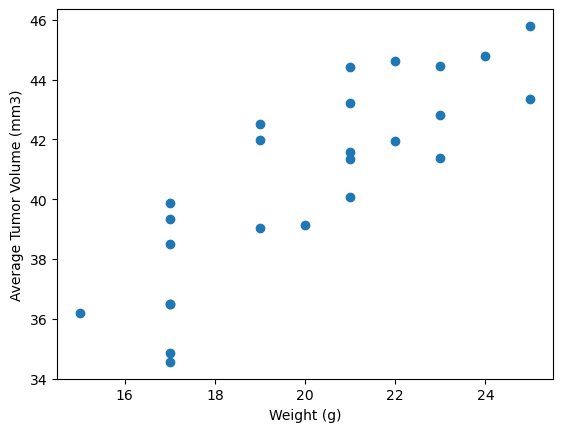

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#gather all mice with Capomulin treatment
mouse_cap = cl_mouse_df.loc[cl_mouse_df["Drug Regimen"] == "Capomulin", : ]
#average individual mouse weights
mouse_ID = mouse_cap.groupby("Mouse ID")
#weight with Capomulin treatment
weight = mouse_ID["Weight (g)"].mean()
av_tumor_vol = mouse_ID["Tumor Volume (mm3)"].mean()

plt.scatter(weight,av_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

#### Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


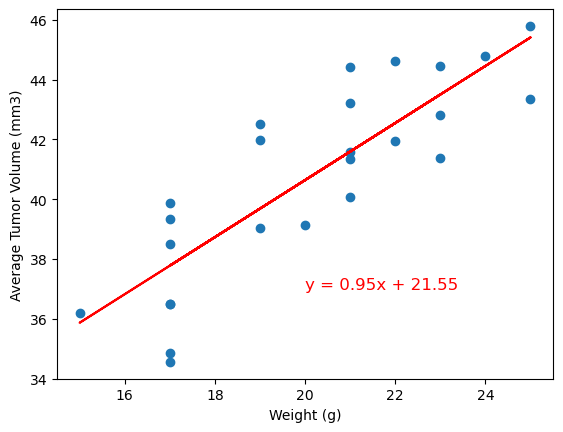

In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, av_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

plt.scatter(weight,av_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#correlation coefficient
x = round(st.pearsonr(weight,av_tumor_vol)[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {x}.")